# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

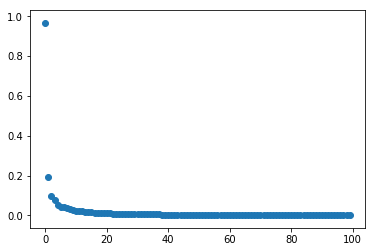

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)

indices9 = np.where(train_labels == 9)
data9 = train_data[indices9]

cov9 = np.cov(data9)

eigen_values9 = np.linalg.eigvals(cov9)
eigen_values9 /= np.linalg.norm(eigen_values9)

x = np.arange(100)
plot_data9 = np.real(eigen_values9[0:100])
plt.scatter(x, plot_data9)




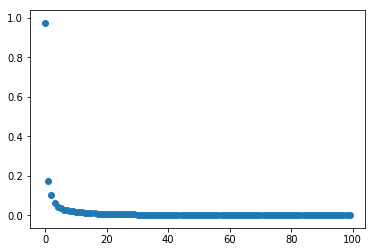

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)

indices0 = np.where(train_labels == 0)
data0 = train_data[indices0]

cov0 = np.cov(data0)

eigen_values0 = np.linalg.eigvals(cov0)
eigen_values0 /= np.linalg.norm(eigen_values0)

x = np.arange(100)
plot_data0 = np.real(eigen_values0[0:100])
plt.scatter(x, plot_data0)


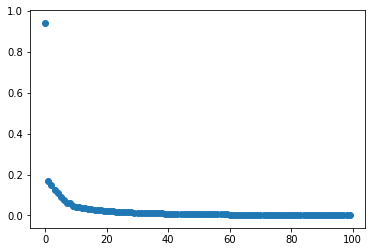

In [4]:
# All training data (plot c)

data_full = train_data
cov_full = np.cov(data_full)

eigen_values_full = np.linalg.eigvals(cov_full)
eigen_values_full /= np.linalg.norm(eigen_values_full)

x = np.arange(100)
plot_data_full = np.real(eigen_values_full[0:100])
plt.scatter(x, plot_data_full)



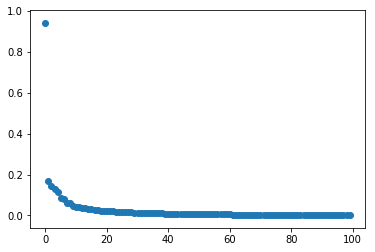

In [5]:
# Randomly selected 50% of the training data (plot d)

# Selecting random values 
indices50 = np.random.choice(int(train_data.shape[0]),int(train_data.shape[0]/2))
data50 = train_data[indices50]
cov50 = np.cov(data50)

eigen_values50 = np.linalg.eigvals(cov50)
eigen_values50 /= np.linalg.norm(eigen_values50)

x = np.arange(100)
plot_data50 = np.real(eigen_values50[0:100])
plt.scatter(x, plot_data50)


### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---

Plots A and B are slightly different because their distributions are different and hence eigen values are different.

Plots B and C differ because B has very few significant eigen values, but since C includes the samples for all classes, it has more number of significant eigen values, hence the plot is not as steep as Plot B. This is clearly visible in the plots. 

Approximate Ranks can be seen by observing where the eigen values start to become zero. In the first two plots, this appears to be near 450 and in the last two plots, around 600-650

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Each of the 784 features per sample can take values from 0 to 255 (256 values). Hence, total possible images can be (256)^(784)

Percentage avaiable to us is 7000/(256)^(784)*100 as total data with 6000/(256)^(784)*100 as training data and 1000/(256)^(784)*100 as test data.

If we had access to all the data, the covariance matrix will be a diagonal matrix with equal eigen values and the plot will be a straight line. 

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

Multiplying by an orthonormal matrix will only rotate the data, but not change the relative positions (or distances) of the plot points. Eigen values remain the same, and so will the plot. Eigen vectors can change.


In [ ]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here

randmatrix = np.random.randn(train_data.shape[0], train_data.shape[0])
Qdecomposition, _ = np.linalg.qr(randmatrix)

ortho_train_data = np.dot(Qdecomposition, train_data)

covar = np.cov(ortho_train_data)

eigen_values = np.linalg.eigvals(covar)
eigen_values /= np.linalg.norm(eigen_values)

x = np.arange(100)
plot_data = np.real(eigen_values[0:100])
plt.scatter(x, plot_data)



### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

When multiplied by a rank deficient matrix with rank R, the data will assume the rank of the rank deficient matrix (R) and the eigen spectrum will hence have only R non-zero eigen values. It will be a very steep exponential curve.

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

In [ ]:
# Plotting code here

covar = np.cov(train_data)

_, eigen_vectors = np.linalg.eig(covar)

data_new = np.dot(eigen_vectors[:,0:2].T, train_data)
plt.scatter(data_new[1],data_new[0])

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [ ]:
# Print accuracy on the test set using MLE

data_new = train_data.T
covar = np.cov(data_new)
eigen_values, eigen_vectors = np.linalg.eig(covar)

indices = eigen_values.argsort()[ : :-1]
indices = indices[ :30]

eigen_vectors_new = eigen_vectors[:, indices]
new_train = train_data.dot(eigen_vectors_new)
new_test = test_data.dot(eigen_vectors_new)

res = np.zeros((10, new_test.shape[0]))

for i in range(10):
    indices = np.where(train_labels == i)
    mean = np.mean(new_train[indices], axis = 0)
    covar = np.cov(new_train[indices].T)
    x = np.dot((new_test - mean), np.linalg.inv(covar))
    y = np.dot(x, (new_test - mean).T)
    res[i] = np.log(np.linalg.det(covar))/2 + np.diagonal(y)/2

mn = np.argmin(res,axis=0)
tot = np.sum(np.where(test_labels == mn, 1, 0))
print(tot / 10)

In [ ]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

data_new = train_data.T
covar = np.cov(data_new)
eigen_values, eigen_vectors = np.linalg.eig(covar)

indices = eigen_values.argsort()[ : :-1]
indices = indices[ :30]

eigen_vectors_new = eigen_vectors[:, indices]
new_train = train_data.dot(eigen_vectors_new)
new_test = test_data.dot(eigen_vectors_new)

p = [0.13, 0.14, 0.04, 0.03, 0.15, 0.13, 0.05, 0.06, 0.15, 0.12]

res = np.zeros((10,new_test.shape[0]))

for i in range(10):
    indices = np.where(train_labels == i)
    mean = np.mean(new_train[indices], axis = 0)
    covar = np.cov(new_train[indices].T)
    x = np.dot((new_test - mean), np.linalg.inv(covar))
    y = np.dot(x, (new_test - mean).T)
    res[i] = np.log(np.linalg.det(covar))/2 + np.diagonal(y)/2 - np.log(p[i])

mn = np.argmin(res, axis=0)
tot = np.sum(np.where(test_labels == mn, 1, 0))
print(tot / 10)

In [ ]:
# Print accuracy using Bayesian pairwise majority voting method

data_new = train_data.T
covar = np.cov(data_new)
eigen_values, eigen_vectors = np.linalg.eig(covar)

indices = eigen_values.argsort()[ : :-1]
indices = indices[ :30]

eigen_vectors_new = eigen_vectors[:, indices]
new_train = train_data.dot(eigen_vectors_new)
new_test = test_data.dot(eigen_vectors_new)

covar = np.zeros((10, 30, 30))
mean = np.zeros((10, 30))

res = np.zeros((10,new_test.shape[0]))

for i in range(10):
    for j in range(10):
        
        indices = np.where(train_labels == j)
        mean[j] = np.mean(new_train[indices], axis = 0)
        covar[j] = np.cov(new_train[indices].T)
        
        indices = np.where(train_labels == i)
        mean[i] = np.mean(new_train[indices], axis = 0)
        covar[i] = np.cov(new_train[indices].T)
        
        covar_total = (covar[j] + covar[i])/2
        
        x = np.dot((new_test - mean[j]), np.linalg.inv(covar_total))
        y = np.dot(x, (new_test - mean[j]).T)
        res1 = np.log(np.linalg.det(covar_total))/2 + np.diagonal(y)/2
        
        x = np.dot((new_test - mean[i]), np.linalg.inv(covar_total))
        y = np.dot(x, (new_test - mean[i]).T)
        res2 = np.log(np.linalg.det(covar_total))/2 + np.diagonal(y)/2
        
        res[j] += np.where((res1 - res2) > 0, 1, 0)
        res[i] += np.where((res2 - res1) >= 0, 1, 0)
        

mn = np.argmin(res,axis = 0)
tot = np.sum(np.where(test_labels == mn, 1, 0))
print(tot / 10)

In [ ]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

data_new = train_data.T
covar = np.cov(data_new)
eigen_values, eigen_vectors = np.linalg.eig(covar)

indices = eigen_values.argsort()[ : :-1]
indices = indices[ :30]

eigen_vectors_new = eigen_vectors[:, indices]
new_train = train_data.dot(eigen_vectors_new)
new_test = test_data.dot(eigen_vectors_new)

covar = np.zeros((10, 30, 30))
mean = np.zeros((10, 30))

res = np.zeros((10,new_test.shape[0]))

for i in range(10):
    for j in range(10):
        
        indices = np.where(train_labels == j)
        mean[j] = np.mean(new_train[indices], axis = 0)
        covar[j] = np.cov(new_train[indices].T)
        
        indices = np.where(train_labels == i)
        mean[i] = np.mean(new_train[indices], axis = 0)
        covar[i] = np.cov(new_train[indices].T)
        
        covar_total = (covar[j] + covar[i]) / 2
        
        y = np.dot((new_test - mean[j]), (new_test - mean[j]).T)
        res1 = np.diagonal(y)/2
        
        y = np.dot((new_test - mean[i]), (new_test - mean[i]).T)
        res2 = np.diagonal(y)/2
        
        res[j] += np.where((res1 - res2) > 0, 1, 0)
        res[i] += np.where((res2 - res1) >= 0, 1, 0)
        

mn = np.argmin(res,axis = 0)
tot = np.sum(np.where(test_labels == mn, 1, 0))
print(tot / 10)

### 1.3.3 Question 4
Compare performances and salient observations

Accuracy with different classifiers:

+ MLE : 94.8 - MLE gives the highest accuracy. This is because we take the covariance matrix into complete account and the Mahalnobis distance to find the distance from the classifying hyperplane. 
+ MAP : 94.6 - MAP shows lower accuracy because we assume the test data is Gaussian with data distributed on the normal random variable class index. Since the data is actually not of that distribution, and we have approximated, we get lower accuracy.
+ Bayesian Voting : 88.4 - Bayesian Voting equates the covariance matrix leading to loss of information thus performing poorer.
+ Perpendicular Bisector : 75.3 - Since the covariance matrices are not equal, L2 norm is a really bad measure.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [ ]:
# Your code here
# Print accuracies with K = 1, 3, 7

dist = np.zeros(shape=(1000,6000))
for i in range(len(test_data)):
    for j in range(len(train_data)):
        dist[i][j] = np.linalg.norm(train_data[j]-test_data[i])

for k in [1,3,7]:
    predictions = 0
    for indices in range(1000):
        count_majority_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        test_sample_dist = np.argsort(dist[indices])[:k]
        for k_test_dist in test_sample_dist:
            calculated_label = int(train_labels[k_test_dist])
            count_majority_array[calculated_label] += 1 
        majority_label = np.argsort(count_majority_array)[ : :-1][0]
        if majority_label == int(test_labels[indices]):
            predictions += 1
    accuracy = predictions/10
    print(accuracy)

### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

The accuracies differ on changing the value of K. 

When K is 1, we are only looking at the nearest neighbour.
As K increases (to 3), we are considering 3 nearest neighbours, which gives us a chance to choose the majority of the K labels that we obtain.
When K becomes large, we may be including far away points which will influence our decision making negatively. Hence accuracies change on basis of K. Typically, they first increase with increaisng K, and then decrease.

K increases, peaks at maximum accuracy and then decreases. We can adopt a regression approach, start from a random point and keep climbing towards the peak, so find the K with highest accuracy 

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [ ]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

We compute the K nearest neighbours for a given test sample. Since these are real values between 0 and 1, and not discrete values unlike ClassIds, we cannot count the majority. 
Instead, Take a mean of these values, and then calculate the accuracy in terms of mean absolute error of the predicted value with the actual value (take the absolute difference between the two for every sample, add them and divide by number of samples in test data).

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [ ]:
# Your code here

dist_neat = np.zeros(shape=(1000,6000))
for i in range(len(test_data)):
    for j in range(len(train_data)):
        dist_neat[i][j]=np.linalg.norm(train_data[j]-test_data[i])
        
k = 5
abs_error = 0
for indices in range(1000):
    sum_values = 0
    test_sample_dist = np.argsort(dist_neat[indices])[ :k]
    for index in test_sample_dist:
        sum_values += train_labels[index]/10
    predicted_value = sum_values/k 
    abs_error += abs(predicted_value - test_labels[indices]/10)
print(abs_error/1000) 

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---